In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T17:57:26.781159+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4764261245727539}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003942728042602539}
!!! {"init_...": 0.0005776882171630859}
!!! {"ete3Tree": 0.6496307849884033}
!!! {"GenomeTree_hierarchical": 0.002825498580932617}
!!! {"mutateBranchETEhierarchy": 0.09643888473510742}
!!! {"write_genome_short": 0.04582548141479492}


  4%|▍         | 8/193 [00:03<00:53,  3.49it/s]

!!! {"writeGenomeNoIndels": 0.17104649543762207}
!!! {"pl.DataFrame": 0.045243024826049805}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0209367275238037}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01738262176513672}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033597946166992188}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001385211944580078}
!!! {"init_...": 0.0004725456237792969}
!!! {"ete3Tree": 7.724761962890625e-05}
!!! {"GenomeTree_hierarchical": 0.0021326541900634766}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 7.104873657226

  8%|▊         | 15/193 [00:03<00:23,  7.46it/s]

!!! {"phastSimRun": 9.894371032714844e-05}
!!! {"init_...": 0.0005545616149902344}
!!! {"ete3Tree": 0.0007882118225097656}
!!! {"GenomeTree_hierarchical": 0.0026519298553466797}
!!! {"mutateBranchETEhierarchy": 0.00013446807861328125}
!!! {"write_genome_short": 0.00015115737915039062}
!!! {"writeGenomeNoIndels": 0.0002396106719970703}
!!! {"pl.DataFrame": 0.00012183189392089844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006695270538330078}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021314620971679688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031685829162597656}
enter log_context_duration for

 13%|█▎        | 26/193 [00:03<00:11, 14.87it/s]

!!! {"ete3Tree": 0.020432233810424805}
!!! {"GenomeTree_hierarchical": 0.001993417739868164}
!!! {"mutateBranchETEhierarchy": 0.005317211151123047}
!!! {"write_genome_short": 0.002299785614013672}
!!! {"writeGenomeNoIndels": 0.007852315902709961}
!!! {"pl.DataFrame": 0.0016050338745117188}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04166698455810547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008594989776611328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003118276596069336}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011539459228515625}
!!! {"init_...": 0.000442028045

 21%|██        | 40/193 [00:03<00:05, 27.31it/s]

!!! {"phastSimRun": 0.00012612342834472656}
!!! {"init_...": 0.0005421638488769531}
!!! {"ete3Tree": 6.031990051269531e-05}
!!! {"GenomeTree_hierarchical": 0.0027382373809814453}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.510185241699219e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005583763122558594}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020456314086914062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003271818161010742}
enter log_context_duration for 

 27%|██▋       | 52/193 [00:03<00:03, 35.83it/s]

!!! {"ete3Tree": 0.021036863327026367}
!!! {"GenomeTree_hierarchical": 0.0026159286499023438}
!!! {"mutateBranchETEhierarchy": 0.0048258304595947266}
!!! {"write_genome_short": 0.002533435821533203}
!!! {"writeGenomeNoIndels": 0.008508920669555664}
!!! {"pl.DataFrame": 0.0016202926635742188}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04328799247741699}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0008912086486816406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00310516357421875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011038780212402344}
!!! {"init_...": 0.00044441223

 31%|███       | 59/193 [00:04<00:03, 41.86it/s]

!!! {"phastSimRun": 0.0001308917999267578}
!!! {"init_...": 0.0005216598510742188}
!!! {"ete3Tree": 7.367134094238281e-05}
!!! {"GenomeTree_hierarchical": 0.002144336700439453}
!!! {"mutateBranchETEhierarchy": 1.33514404296875e-05}
!!! {"write_genome_short": 7.081031799316406e-05}
!!! {"writeGenomeNoIndels": 1.2636184692382812e-05}
!!! {"pl.DataFrame": 7.081031799316406e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005318641662597656}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017142295837402344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=37, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032088756561279297}
enter log_context_duration for _

 38%|███▊      | 73/193 [00:04<00:02, 50.69it/s]

!!! {"phastSimRun": 0.00010418891906738281}
!!! {"init_...": 0.0005211830139160156}
!!! {"ete3Tree": 8.606910705566406e-05}
!!! {"GenomeTree_hierarchical": 0.0021839141845703125}
!!! {"mutateBranchETEhierarchy": 9.775161743164062e-06}
!!! {"write_genome_short": 6.723403930664062e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 7.009506225585938e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005499839782714844}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017404556274414062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003179311752319336}
enter log_context_duration for _

 41%|████      | 79/193 [00:04<00:02, 49.59it/s]

!!! {"init_...": 0.0009133815765380859}
!!! {"ete3Tree": 0.008198022842407227}
!!! {"GenomeTree_hierarchical": 0.002052783966064453}
!!! {"mutateBranchETEhierarchy": 0.0018045902252197266}
!!! {"write_genome_short": 0.00092315673828125}
!!! {"writeGenomeNoIndels": 0.002992391586303711}
!!! {"pl.DataFrame": 0.0006082057952880859}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.019179582595825195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00041103363037109375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004161357879638672}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000106573

 47%|████▋     | 90/193 [00:04<00:02, 40.41it/s]

!!! {"write_genome_short": 0.0005142688751220703}
!!! {"writeGenomeNoIndels": 7.843971252441406e-05}
!!! {"pl.DataFrame": 0.0001163482666015625}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0054471492767333984}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002143383026123047}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031049251556396484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001010894775390625}
!!! {"init_...": 0.0004112720489501953}
!!! {"ete3Tree": 6.008148193359375e-05}
!!! {"GenomeTree_hierarchical": 0.002126455307006836}
!!! {"mutateBranchETEhierarchy": 1.0013580

 50%|█████     | 97/193 [00:04<00:02, 46.04it/s]

!!! {"write_genome_short": 0.0005400180816650391}
!!! {"writeGenomeNoIndels": 7.152557373046875e-06}
!!! {"pl.DataFrame": 7.390975952148438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0054433345794677734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019025802612304688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030984878540039062}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.775161743164062e-05}
!!! {"init_...": 0.00042748451232910156}
!!! {"ete3Tree": 6.67572021484375e-05}
!!! {"GenomeTree_hierarchical": 0.002104043960571289}
!!! {"mutateBranchETEhierarchy": 1.168251

 56%|█████▋    | 109/193 [00:05<00:01, 47.34it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035741329193115234}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010275840759277344}
!!! {"init_...": 0.00045871734619140625}
!!! {"ete3Tree": 0.000102996826171875}
!!! {"GenomeTree_hierarchical": 0.0021369457244873047}
!!! {"mutateBranchETEhierarchy": 1.8596649169921875e-05}
!!! {"write_genome_short": 7.200241088867188e-05}
!!! {"writeGenomeNoIndels": 2.0503997802734375e-05}
!!! {"pl.DataFrame": 7.224082946777344e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004828929901123047}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018072128295898438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd

 63%|██████▎   | 122/193 [00:05<00:01, 52.03it/s]

!!! {"init_...": 0.0006973743438720703}
!!! {"ete3Tree": 6.222724914550781e-05}
!!! {"GenomeTree_hierarchical": 0.0021483898162841797}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 0.0004029273986816406}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 6.914138793945312e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005081653594970703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018930435180664062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031037330627441406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.846

 70%|██████▉   | 135/193 [00:05<00:01, 56.23it/s]

!!! {"phastSimRun": 0.00010395050048828125}
!!! {"init_...": 0.0005438327789306641}
!!! {"ete3Tree": 0.00018286705017089844}
!!! {"GenomeTree_hierarchical": 0.0021157264709472656}
!!! {"mutateBranchETEhierarchy": 4.696846008300781e-05}
!!! {"write_genome_short": 8.630752563476562e-05}
!!! {"writeGenomeNoIndels": 5.173683166503906e-05}
!!! {"pl.DataFrame": 7.748603820800781e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005689382553100586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001785755157470703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003069639205932617}
enter log_context_duration for _

 74%|███████▎  | 142/193 [00:05<00:00, 58.12it/s]

!!! {"phastSimRun": 0.00010538101196289062}
!!! {"init_...": 0.0005142688751220703}
!!! {"ete3Tree": 0.0002009868621826172}
!!! {"GenomeTree_hierarchical": 0.002209186553955078}
!!! {"mutateBranchETEhierarchy": 3.647804260253906e-05}
!!! {"write_genome_short": 8.440017700195312e-05}
!!! {"writeGenomeNoIndels": 5.3882598876953125e-05}
!!! {"pl.DataFrame": 7.987022399902344e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005665779113769531}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018858909606933594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003241300582885742}
enter log_context_duration for _d

 80%|███████▉  | 154/193 [00:06<00:00, 47.44it/s]

!!! {"writeGenomeNoIndels": 0.01136636734008789}
!!! {"pl.DataFrame": 0.00218963623046875}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05640244483947754}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011532306671142578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009123086929321289}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001285076141357422}
!!! {"init_...": 0.00048160552978515625}
!!! {"ete3Tree": 0.02364945411682129}
!!! {"GenomeTree_hierarchical": 0.0020723342895507812}
!!! {"mutateBranchETEhierarchy": 0.006310939788818359}
!!! {"write_genome_short": 0.00317239761

 83%|████████▎ | 160/193 [00:07<00:02, 11.90it/s]

!!! {"mutateBranchETEhierarchy": 0.04606914520263672}
!!! {"write_genome_short": 0.021611690521240234}
!!! {"writeGenomeNoIndels": 0.07091021537780762}
!!! {"pl.DataFrame": 0.01286458969116211}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.32988953590393066}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00696563720703125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032973289489746094}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001418590545654297}
!!! {"init_...": 0.0004725456237792969}
!!! {"ete3Tree": 0.00010514259338378906}
!!! {"GenomeTree_hierarchical": 0.002249717712402

 85%|████████▌ | 165/193 [00:07<00:01, 14.63it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006294965744018555}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011396408081054688}
!!! {"init_...": 0.0004582405090332031}
!!! {"ete3Tree": 0.009300947189331055}
!!! {"GenomeTree_hierarchical": 0.0020503997802734375}
!!! {"mutateBranchETEhierarchy": 0.002092599868774414}
!!! {"write_genome_short": 0.0011813640594482422}
!!! {"writeGenomeNoIndels": 0.0034797191619873047}
!!! {"pl.DataFrame": 0.0007226467132568359}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021005868911743164}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00053

 92%|█████████▏| 178/193 [00:07<00:00, 21.90it/s]

!!! {"ete3Tree": 0.0644998550415039}
!!! {"GenomeTree_hierarchical": 0.0020852088928222656}
!!! {"mutateBranchETEhierarchy": 0.01613759994506836}
!!! {"write_genome_short": 0.007484912872314453}
!!! {"writeGenomeNoIndels": 0.025326967239379883}
!!! {"pl.DataFrame": 0.004847526550292969}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12282633781433105}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00241851806640625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032792091369628906}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013899803161621094}
!!! {"init_...": 0.000464916229248046

 95%|█████████▍| 183/193 [00:08<00:00, 25.05it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006772756576538086}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001742839813232422}
!!! {"init_...": 0.00046133995056152344}
!!! {"ete3Tree": 0.00894308090209961}
!!! {"GenomeTree_hierarchical": 0.0027778148651123047}
!!! {"mutateBranchETEhierarchy": 0.002237081527709961}
!!! {"write_genome_short": 0.0012388229370117188}
!!! {"writeGenomeNoIndels": 0.0036437511444091797}
!!! {"pl.DataFrame": 0.0007669925689697266}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022013425827026367}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006327629089355469}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_new

100%|██████████| 193/193 [00:08<00:00, 23.31it/s]

!!! {"pl.DataFrame": 0.002599000930786133}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05936145782470703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0016489028930664062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031745433807373047}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001304149627685547}
!!! {"init_...": 0.0004756450653076172}
!!! {"ete3Tree": 7.033348083496094e-05}
!!! {"GenomeTree_hierarchical": 0.0021674633026123047}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 6.961822509765625e-05}
!!! {"writeGenomeNoIndels": 7.152557373

exit log_context_duration for extract variant
!!! {"extract variant": 0.09754824638366699}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2661721706390381}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03553342819213867}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002616405487060547}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03328514099121094}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002160310745239258}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0026865005493164062}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03304433822631836}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0028772354125976562}
enter log_context_duration for seq_ar

 43%|████▎     | 3/7 [00:00<00:00, 22.87it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03358864784240723}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003476381301879883}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002527952194213867}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033483028411865234}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035064220428466797}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025463104248046875}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for misma

100%|██████████| 7/7 [00:00<00:00, 23.28it/s]

exit log_context_duration for seq_arr
!!! {"seq_arr": 0.004297018051147461}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.814697265625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03507232666015625}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003728628158569336}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014564990997314453}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020823001861572266}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0030994415283203125}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs"

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.27830052375793457}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 159.20it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.16048550605774}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 602.12it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 139.76082706451416}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.060957908630371094}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 203.0972135066986}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009295225143432617}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003829002380371094}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00040149688720703125}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004165172576904297}
ancestral


100%|██████████| 368/368 [00:00<00:00, 191715.80it/s]

process mutations:   0%|          | 1/368 [00:00<01:18,  4.69it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:18<14:23,  2.40s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.6s



process mutations:  13%|█▎        | 48/368 [01:12<07:50,  1.47s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:07<06:38,  1.42s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.3min



process mutations:  35%|███▍      | 128/368 [03:02<05:35,  1.40s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.2min



process mutations:  46%|████▌     | 168/368 [04:00<04:43,  1.42s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.1min



process mutations:  57%|█████▋    | 208/368 [04:52<03:40,  1.38s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.0min



process mutations:  67%|██████▋   | 248/368 [05:45<02:43,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  5.9min



process mutations:  78%|███████▊  | 288/368 [06:39<01:48,  1.36s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  6.9min



process mutations:  89%|████████▉ | 328/368 [07:31<00:53,  1.34s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.7min



process mutations: 100%|██████████| 368/368 [08:25<00:00,  1.37s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.4min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.5min finished


process replicate: 100%|██████████| 1/1 [12:02<00:00, 722.99s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.09507393836975098}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 114
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '8d21ca00-fa67-83d2-a1a4-59c7c6e9be80', '8d21ca00-fa67-83d2-a1a4-59c7c6e9be80', '8d21ca00-fa67-83d2-a1a4-59c7c6
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


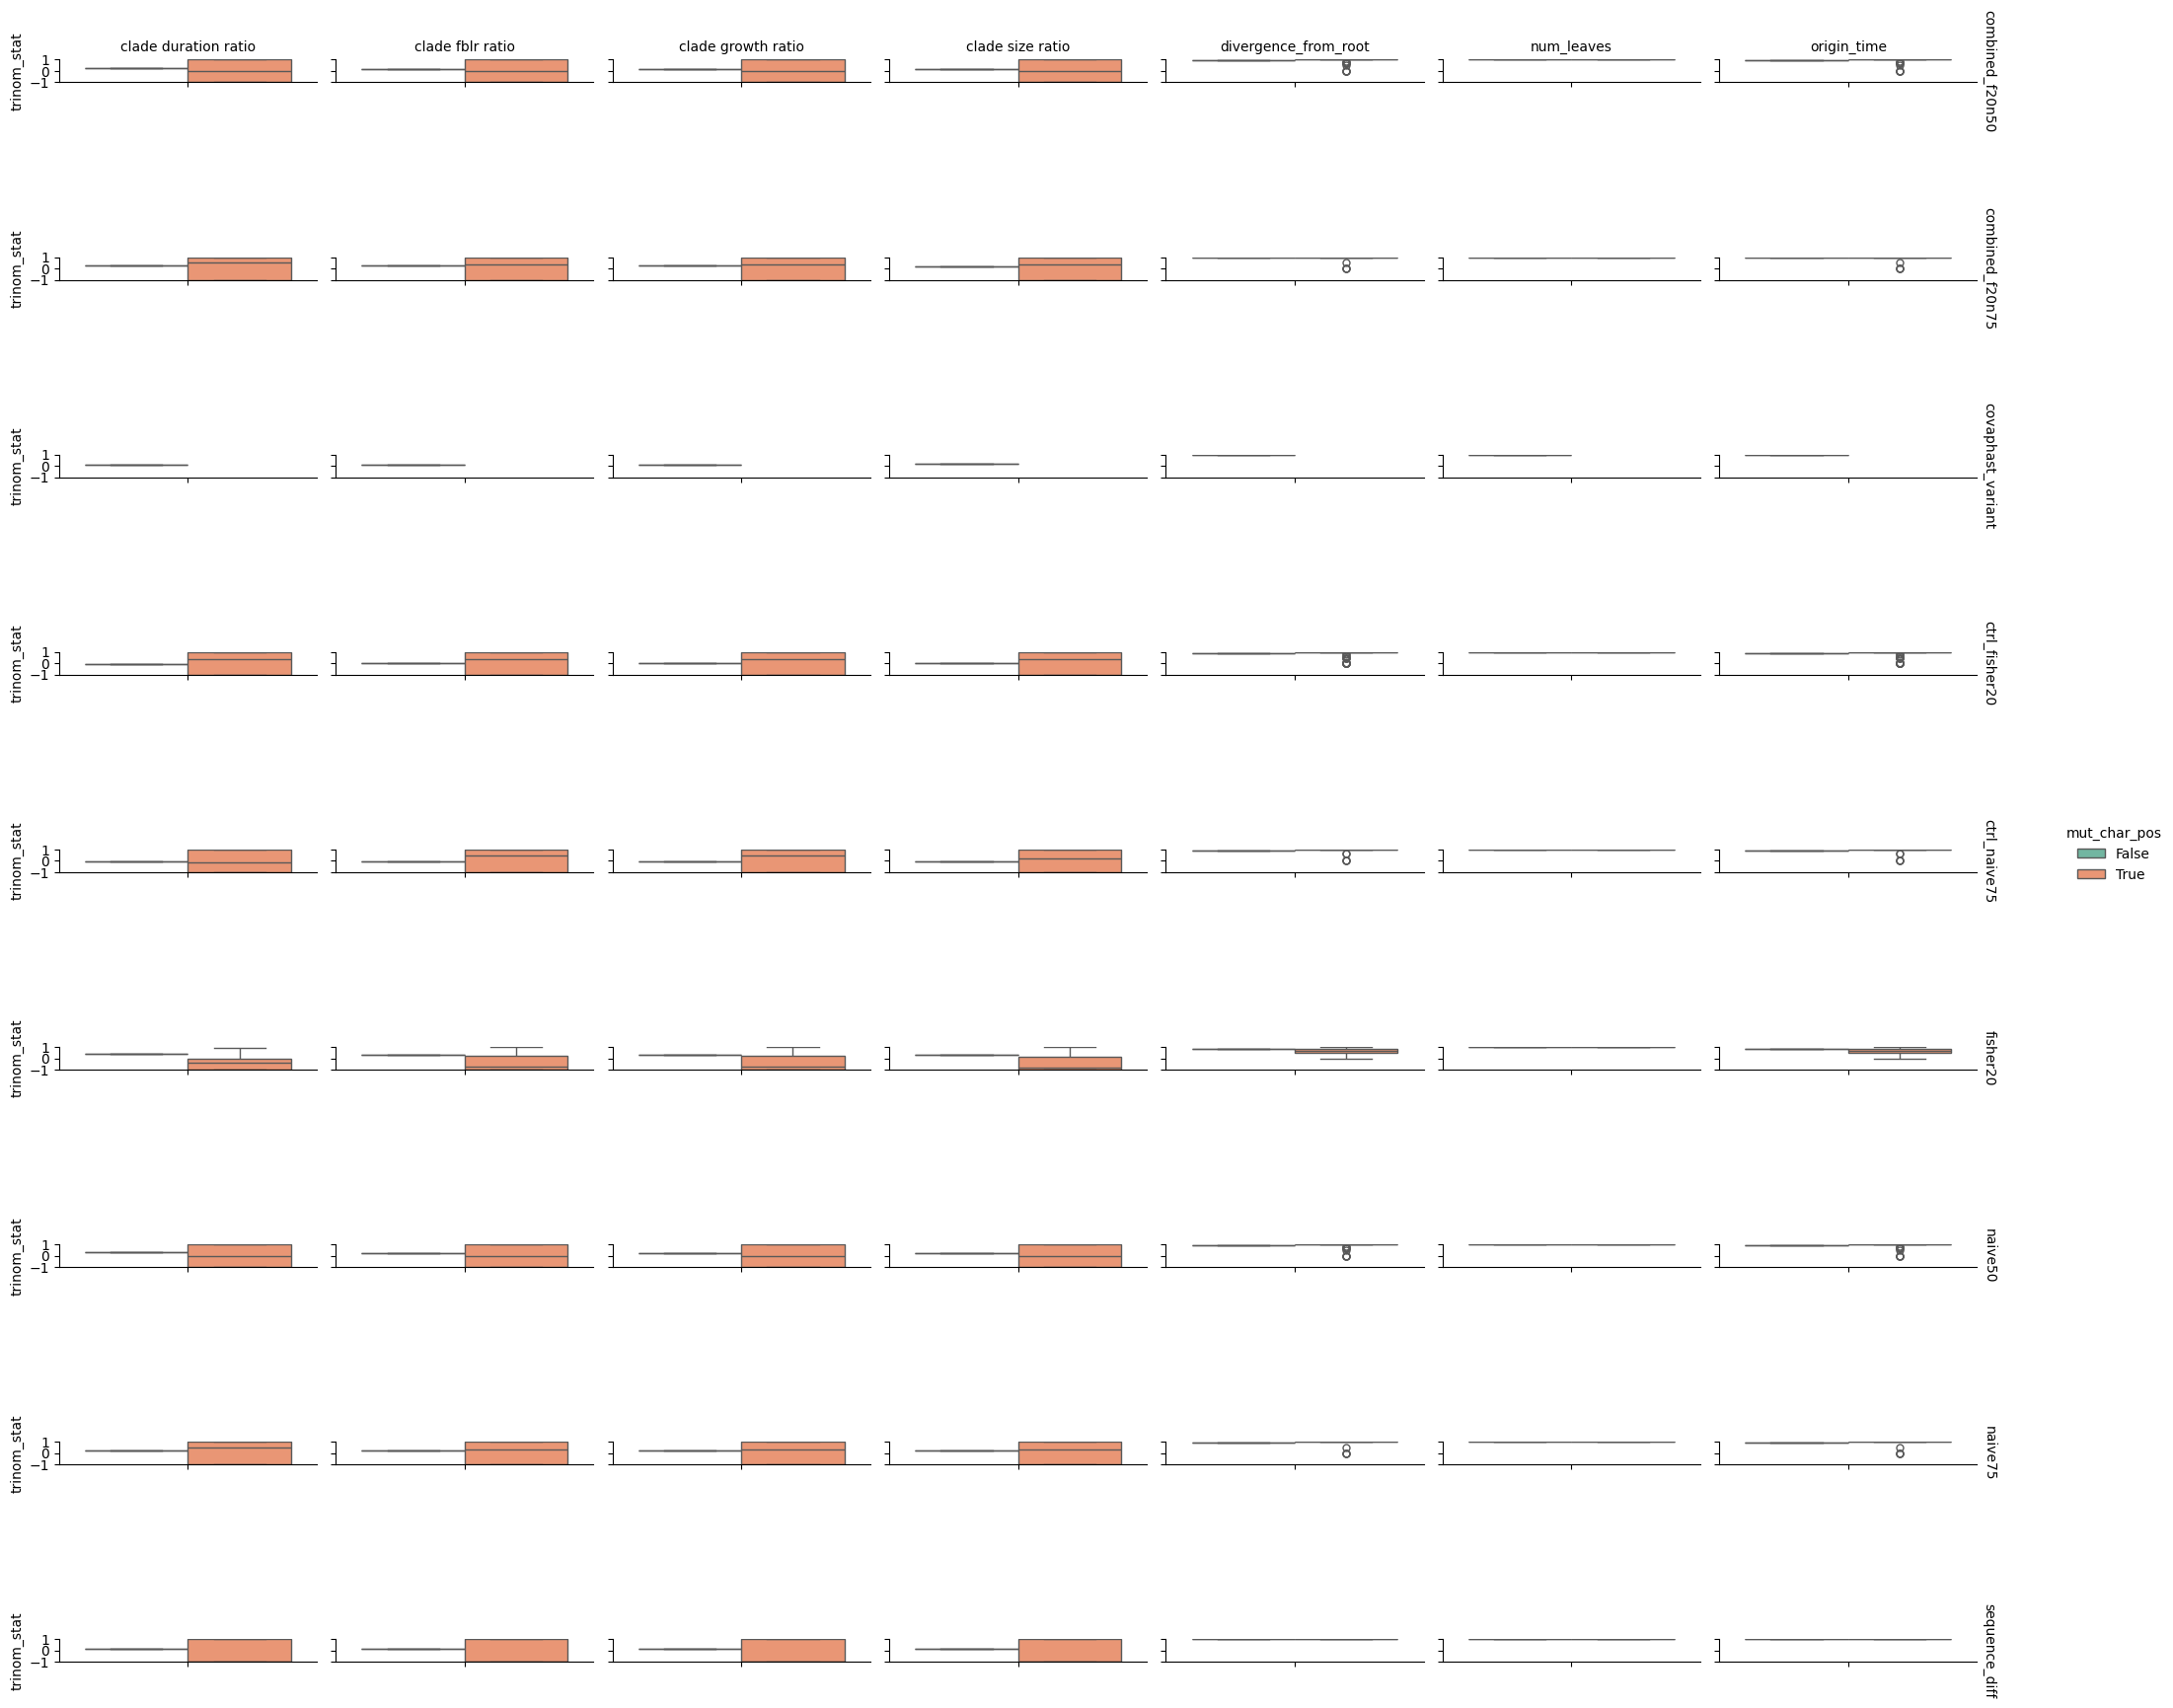

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


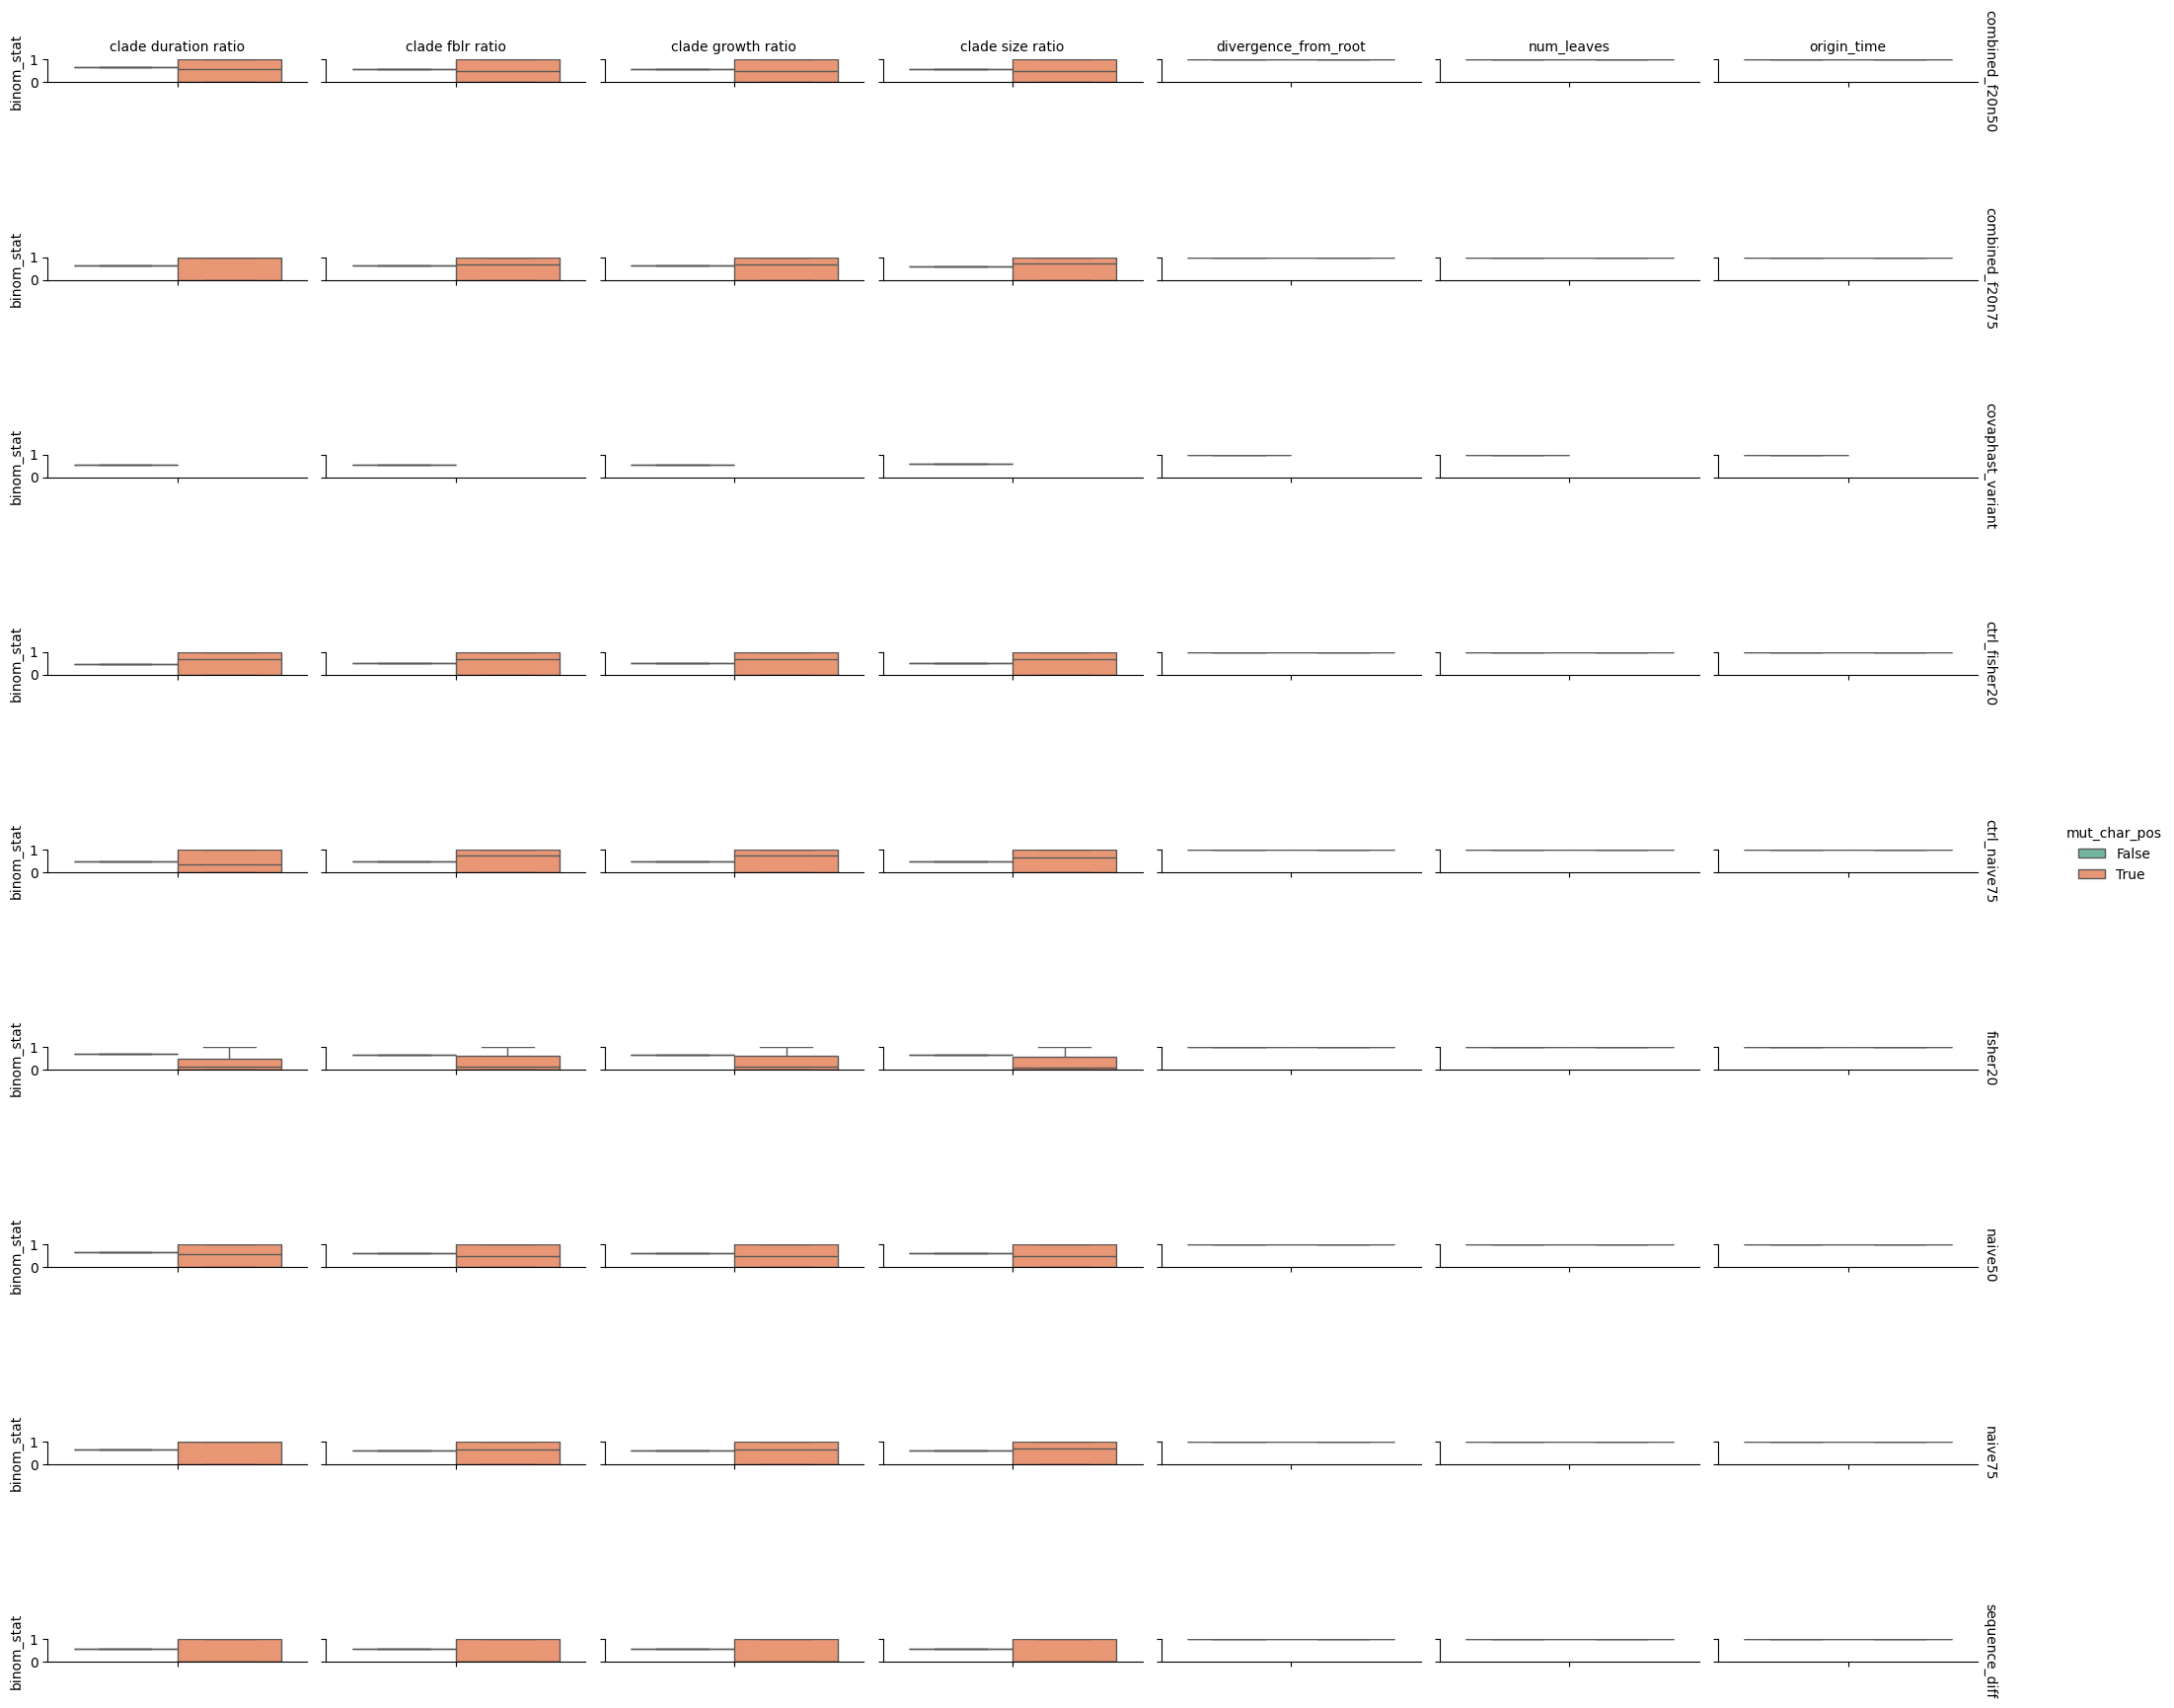

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


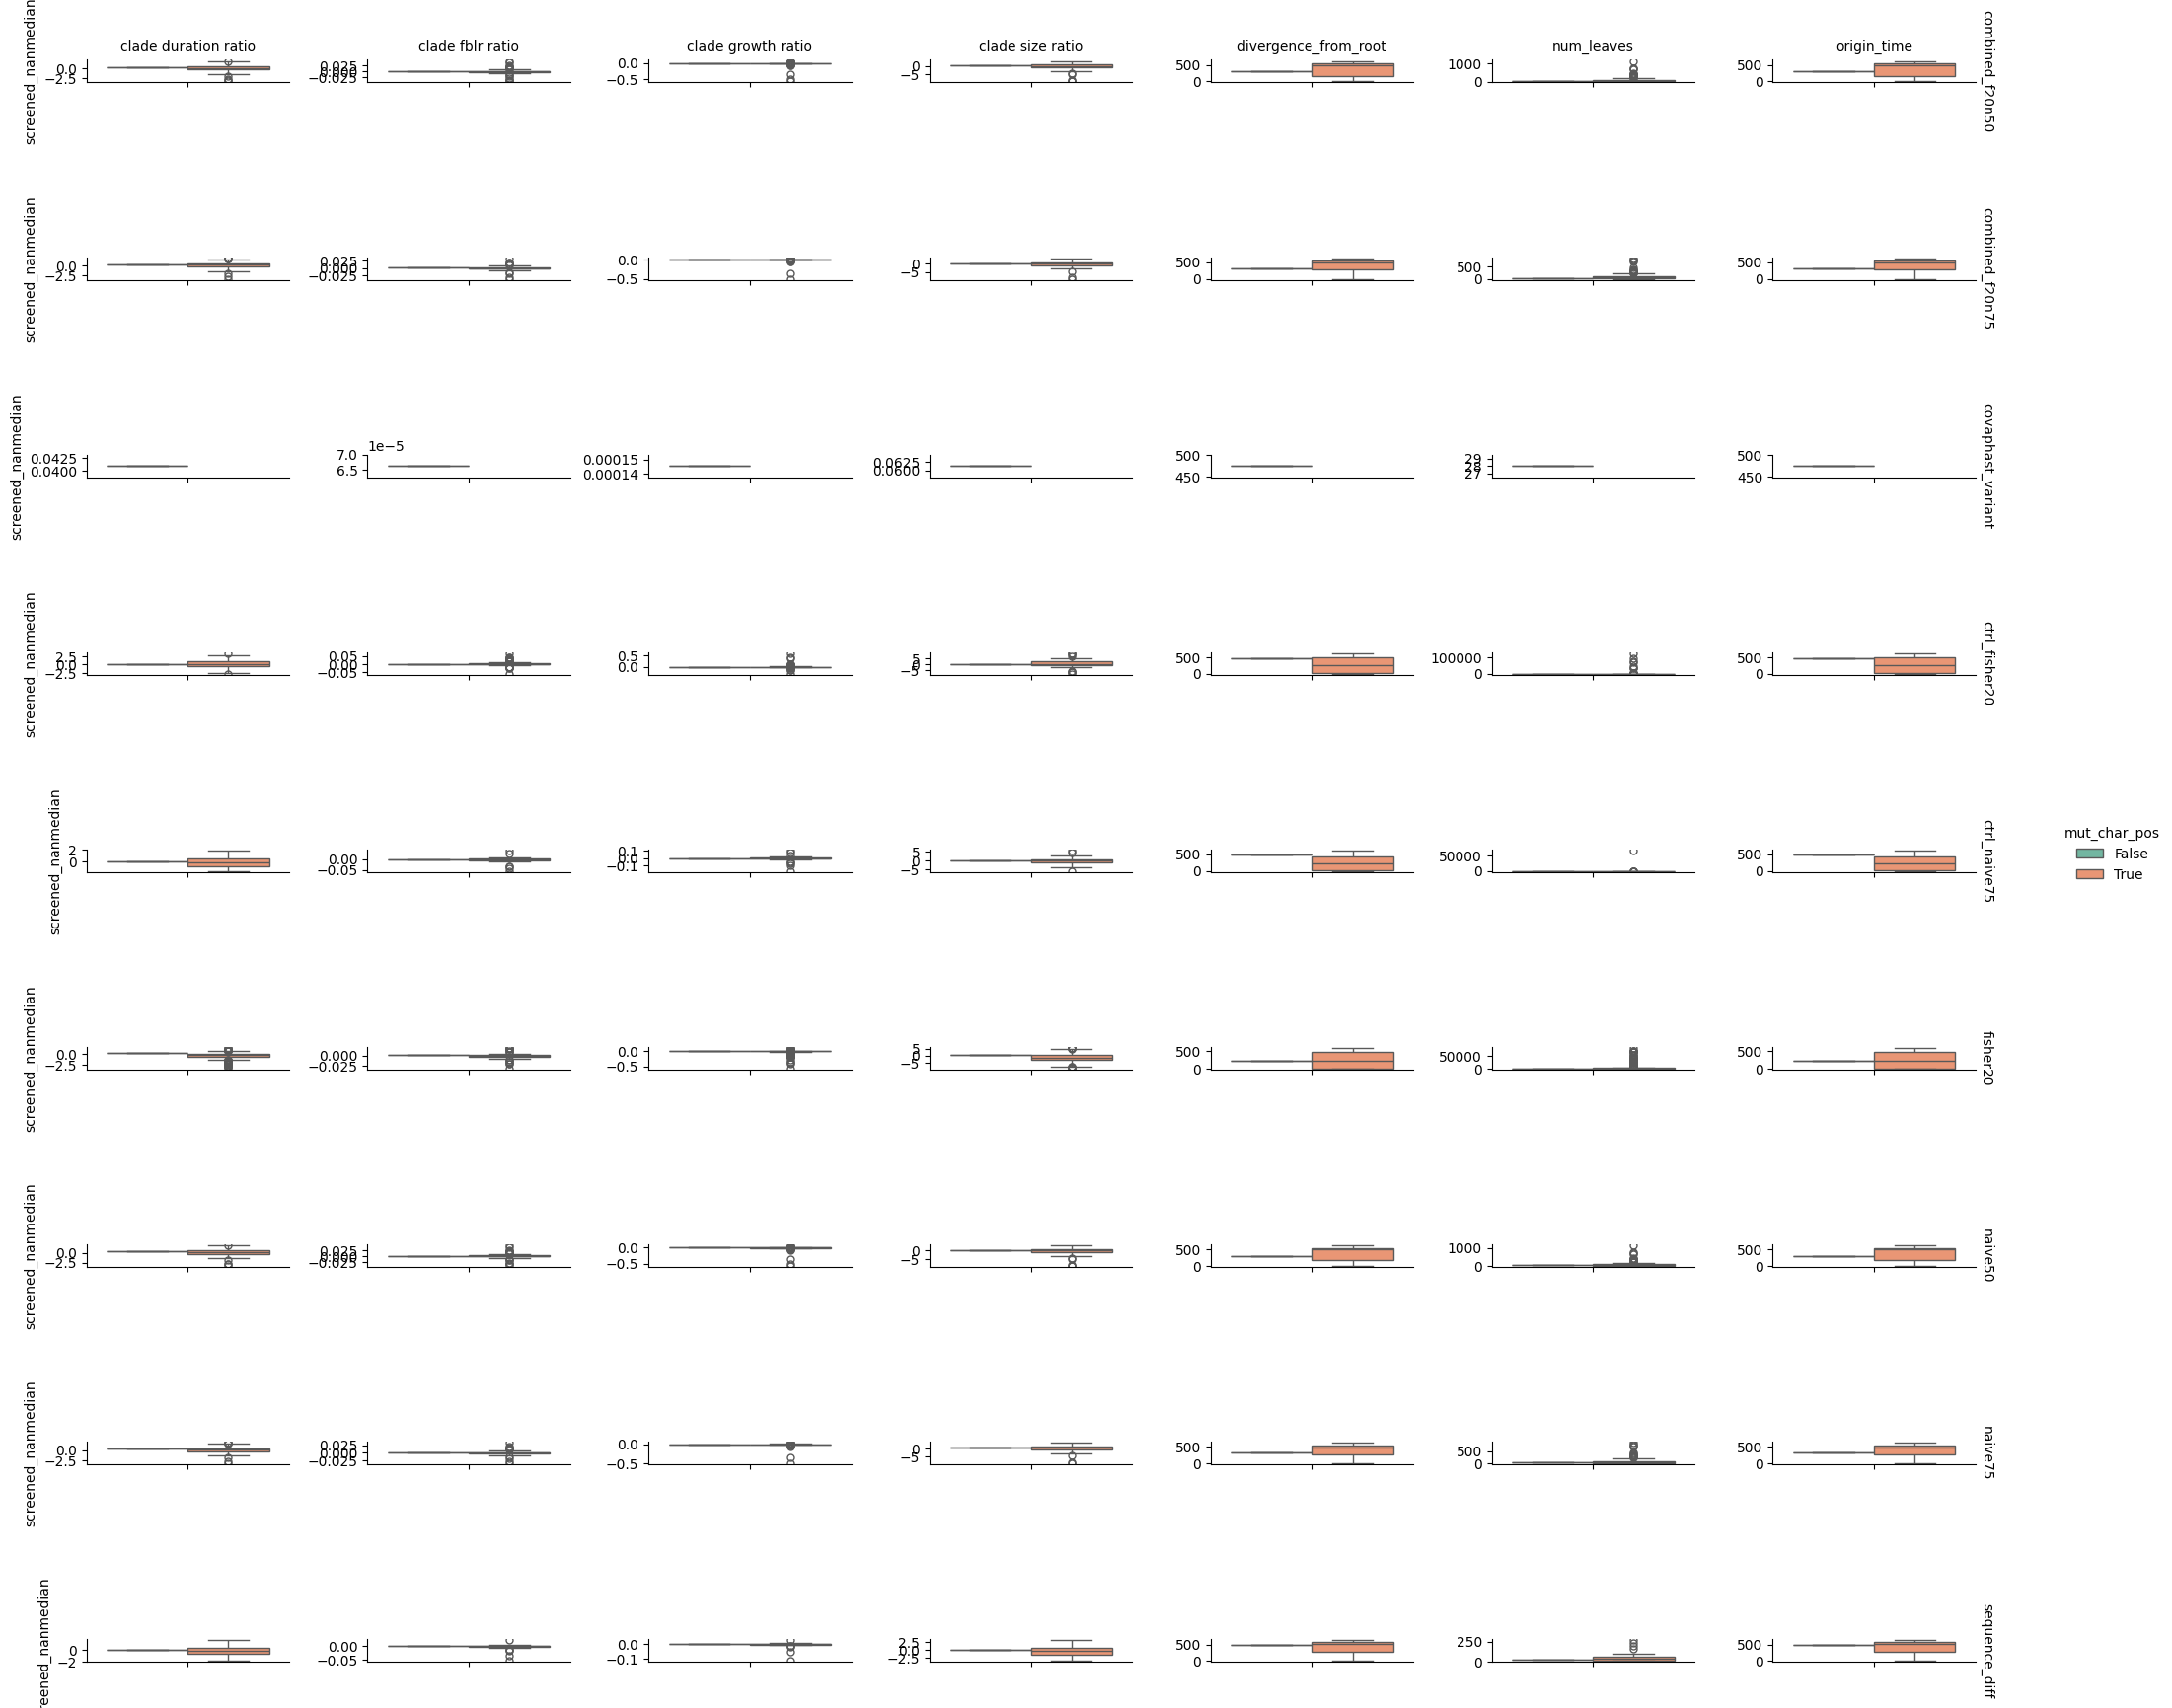

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


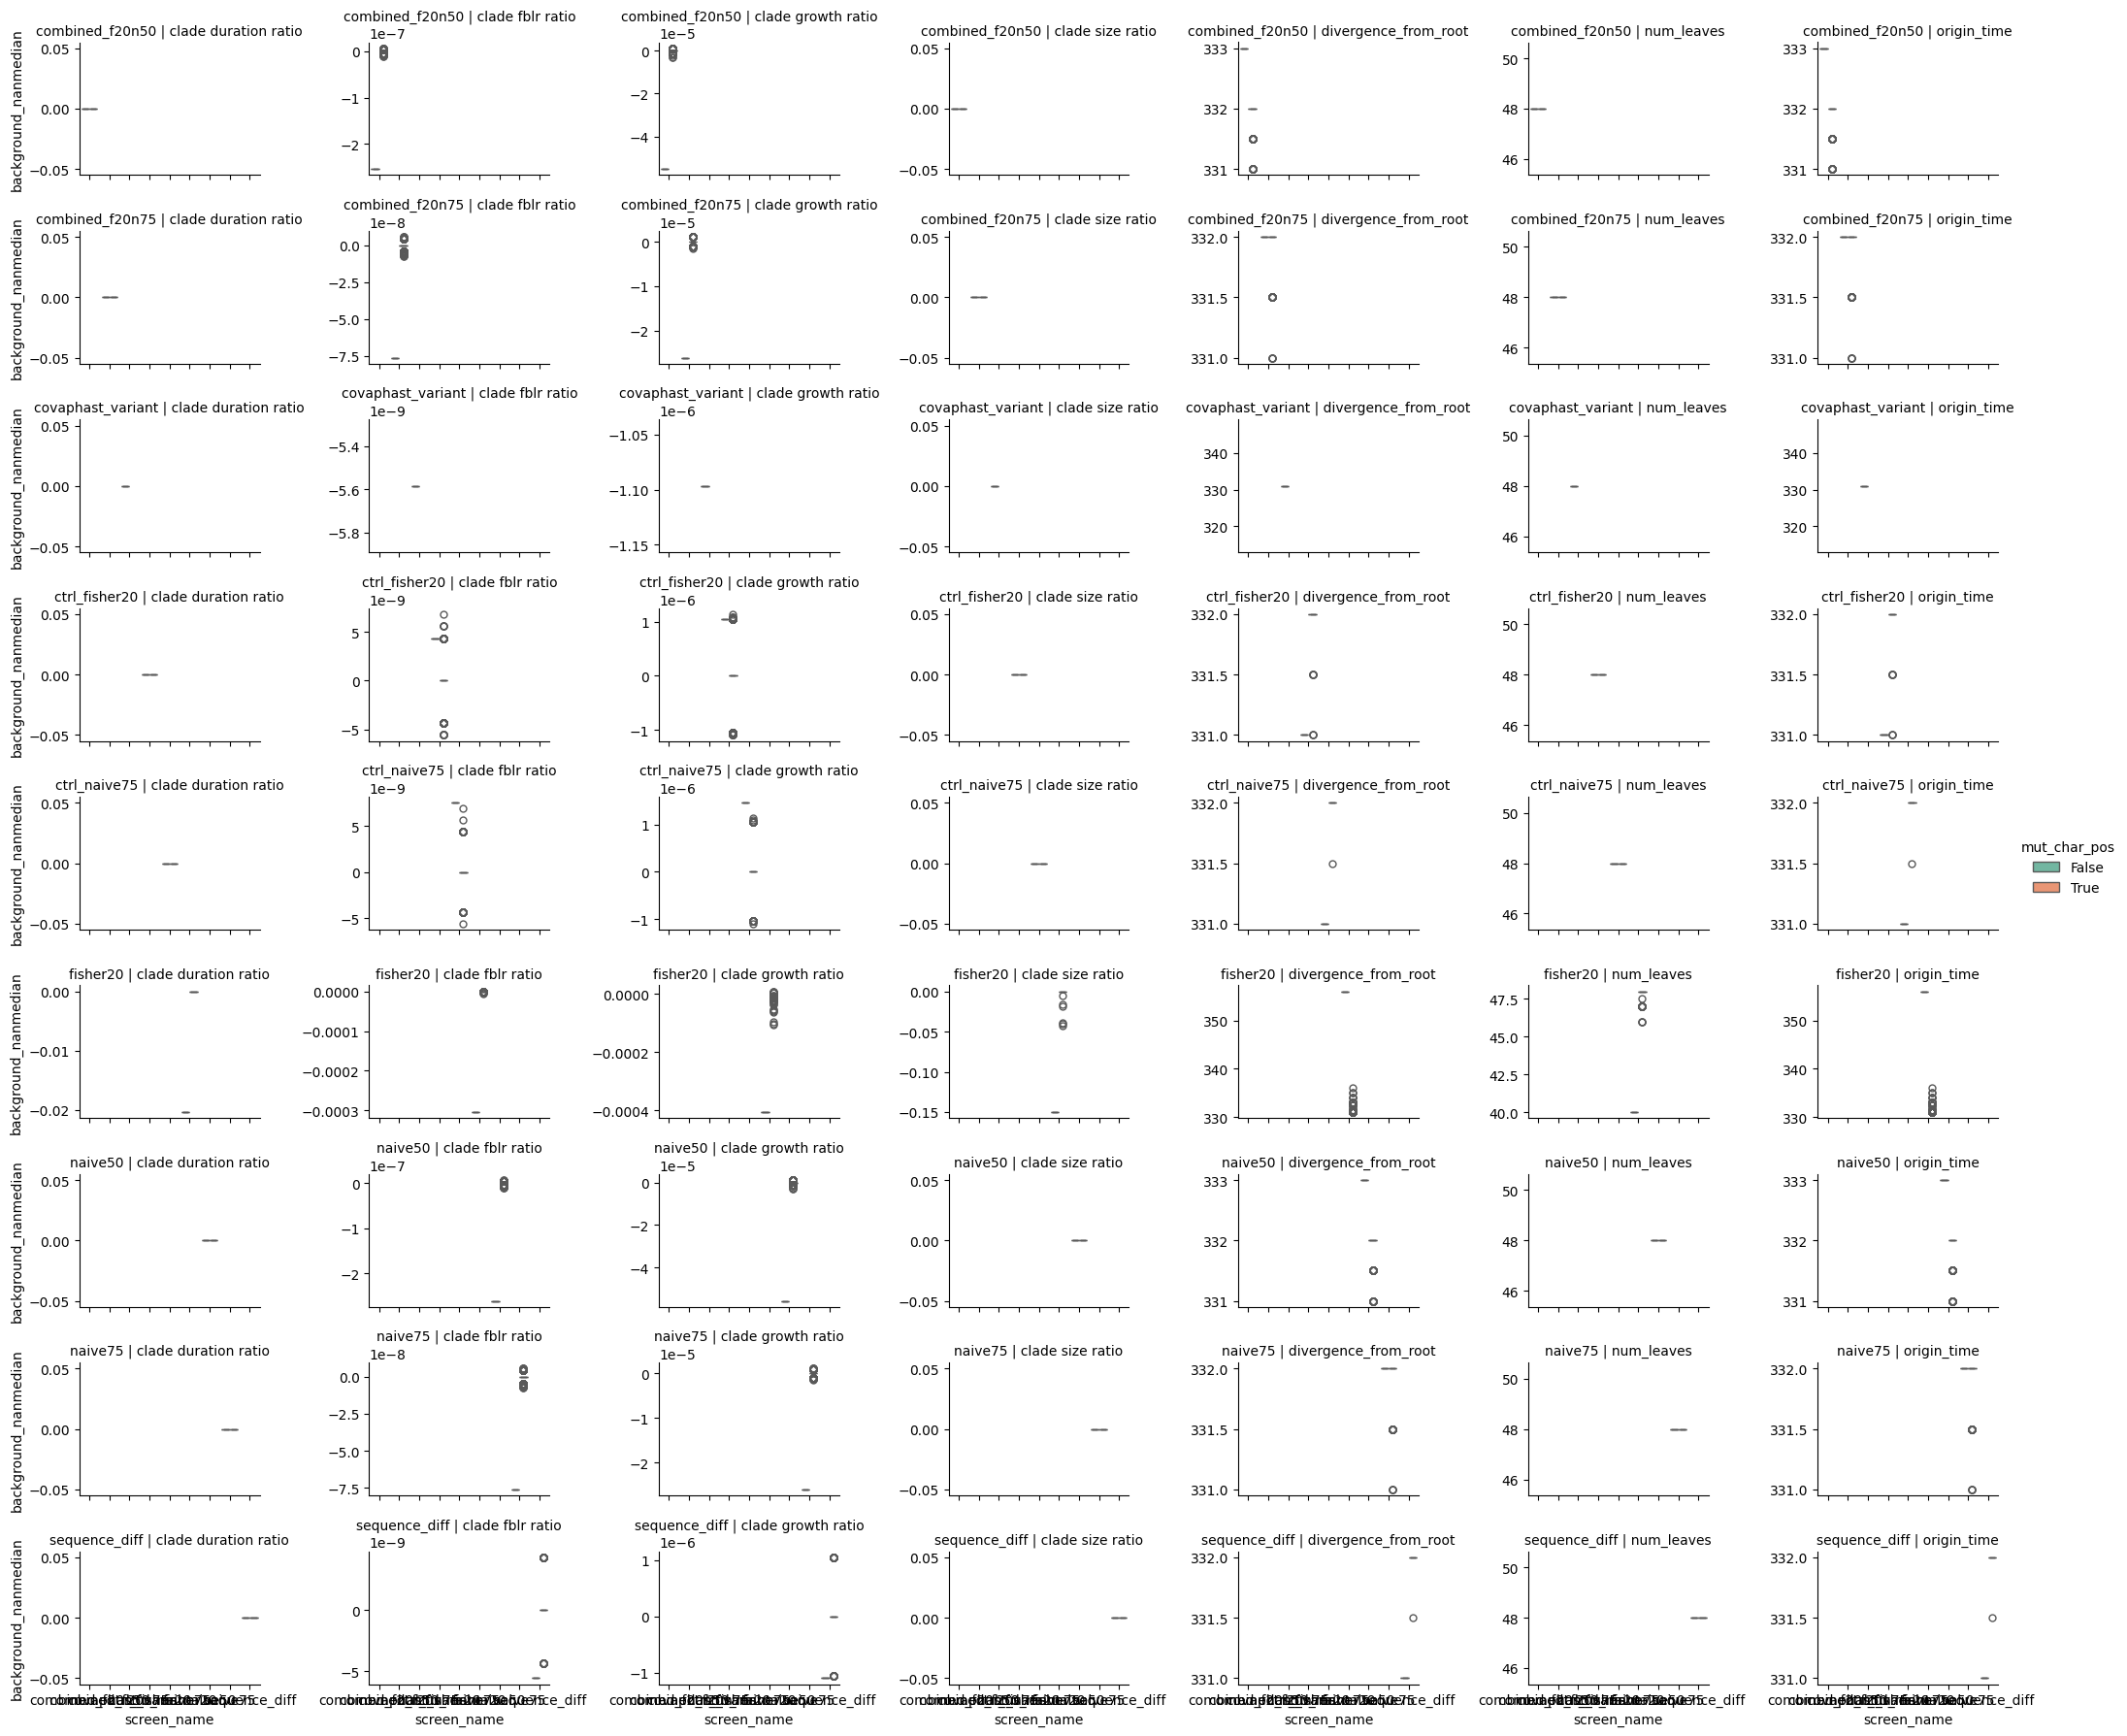

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
